<a href="https://colab.research.google.com/github/dev-researcher/automatas/blob/main/EML_2024_2_Trabajo_Practico_3_Arjun_Elena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Maestría Académica en Ciencias de la Computación**

**Curso: Electiva Aprendizaje Automático**

**Segundo Semestre 2024**

**Profesor: Dr. Luis-Alexander Calvo-Valverde**

---

**Trabajo Práctico:** 3

**Datos de la entrega:** Miércoles 30 de octubre 2024, a más tardar a las 6:00 pm

**Medio de entrega**: Por medio del TEC-Digital.

**Entregables**: Un archivo jupyter ( .IPYNB ) y todos los archivos adiconales que se requieran para correr su Cuaderno (En un archivo comprimido)

---

**Estudiantes:**
- Arjun Sing
- Elena Portuguez





# Nota Introductoria.

Usted puede cambiar el dataset que se le proporciona por otro de su interés; pero de hacerlo, se le recomienda valorarlo con el profesor para que su dataset no le agregue una complicación importante al Trabajo Práctico.

___

# Parte 1  -  Clustering en imágenes de emociones
___

### Considere lo siguiente:
1. Conjunto de datos: **datos_imagenes_USAR.csv**
1. Este dataset corresponde a pixeles en imágenes, a partir de las cuales se desea descubrir cuántos grupos (clusters) se podrían encontrar. Se cree que son diferentes emociones de las personas en las imágenes (alegría, enojo, tristeza, etc).
1. Proponga dos algoritmo a utilizar
1. Proponga dos métricas, las cuales deben ser **internas**.
1. Debe presentar en este cuaderno:
    1. Pre-procesamiento de los datos, explicando las decisiones en cada caso. Observará que en este caso viene bastante preparado pero Usted puede proponer un pre-procesado que según el estado del arte podría mejorar el agrupamiento.
    1. Para cada algoritmo seleccionado:
        1. Explicación del algoritmo.
        1. Explicación de la implementación seleccionada y de sus parámetros.
    1. Explicación del diseño experimental por ejecutar. En este caso recuerde que es aprendizaje NO Supervisado. **Además en cuanto al número de clusters, se cree que es mayor que uno y menor que veinte**.
    1. Programación del diseño experimental.
    1. Muestre en una tabla los resultados de las métricas.
    1. Grafique para ver el criterio del codo para cada algoritmo.



___

# Parte 2  - Breve artículo científico
___

- Debe escribir un breve artículo científico sobre su trabajo.
- El artículo se debe confeccionar en LaTeX, formato de IEEE Transactions.
- Debe incluir al menos:
  - Título
  - Autores y afiliaciones
  - Resumen
  - Palabras claves
  - Introducción
  - Trabajos relacionados - Estado del arte
  - Conceptos claves (Background)
  - Materiales y métodos.
  - Resultados
  - Análisis de resultados
  - Conclusiones
  - Trabajo Futuro
- Debe aportar las fuentes LATEX y el PDF con su artículo.
- Puede ser en español o inglés, no combinar.

##Criterios de evaluación:
1. Cuaderno de Jupyter con la implementación de su Diseño Experimental. Incluyendo todos los archivos necesarios para correr su propuesta. (**70 puntos**)
1. Breve artículo científico sobre su experimentación. Incluyendo las fuentes LATEX y el PDF.  (**30 puntos**)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datos_imagenes_USARHALF.csv to datos_imagenes_USARHALF.csv


**Preprocesamiento:**

Normalización de StandardScaler para garantizar que todos los valores de píxeles estén en la misma escala. Esto es crucial para los datos de imágenes, ya que los valores de píxeles pueden variar ampliamente.
Preprocesamiento adicional que se podría agregar según el estado de la técnica:

* Reducción de dimensionalidad (PCA)

* Suavizado de imagen o reducción de ruido

* Extracción de características mediante CNN entrenadas previamente

Estamos haciendo una reducción de dimensionalidad mediante PCA (análisis de componentes principales) para reducir las dimensiones y, al mismo tiempo, conservar la varianza clave, lo que permite que los algoritmos de agrupamiento funcionen de manera más eficiente.

**Algoritmos seleccionados:**
* **K-means:** un algoritmo basado en centroides ideal para encontrar grupos esféricos en datos de píxeles. K-means busca dividir los datos en grupos k al minimizar la varianza dentro de cada grupo. Probaremos diferentes valores de k de *2 a 20* para encontrar la cantidad óptima de grupos. Para identificar la cantidad de grupos, representaremos gráficamente la varianza dentro del grupo para cada *k*.
* **DBSCAN:** un algoritmo basado en densidad que puede encontrar grupos de formas arbitrarias y es menos sensible a los valores atípicos. DBSCAN identifica grupos según la densidad. Es bueno para identificar grupos en datos con ruido. *eps* (distancia entre puntos para considerarlos vecinos) y min_samples (cantidad mínima de puntos para formar una región densa) son cruciales. Experimentaremos para encontrar valores adecuados. Para DBSCAN, utilizaremos la puntuación *Silhouette* para identificar las mejores configuraciones de parámetros en lugar de un gráfico de codo tradicional

**Métricas internas seleccionadas:**
* **Puntuación de silueta:** mide la similitud de un objeto con su propio grupo en comparación con otros grupos
* **Puntuación de Calinski-Harabasz:** relación entre la dispersión entre grupos y la dispersión dentro de los grupos

**Detalles del algoritmo:**

**K-means:**

 * **Implementación:** sklearn.cluster.KMeans
 *  **Parámetros:**
      * n_clusters: rango de prueba de 2 a 20
      * random_state: 42 para reproducibilidad
      * n_init: 10 para inicializaciones múltiples

**DBSCAN:**

  * **Implementación:** sklearn.cluster.DBSCAN
  * **Parámetros:**

      * eps: rango de prueba de 0,1 a 2
      * min_samples: 5 (predeterminado)


**Diseño experimental:**

**Para K-means:**

* Probaremos todos los números de clúster de 2 a 20
* Usaremos el método del codo para encontrar el k óptimo
* Calcularemos ambas métricas para cada *k*

**Para DBSCAN:**

* Probaremos el rango de valores eps
* Filtramos los resultados para asegurarnos de que 1 < n_clusters < 20
* Calculamos métricas para resultados de agrupamiento válidos

<ipython-input-3-97daf20a924c>:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if df.select_dtypes(include='object').applymap(lambda x: isinstance(x, str) and ';' in x).any().any():


Data reduced to 264 principal components.

Running K-means clustering analysis...


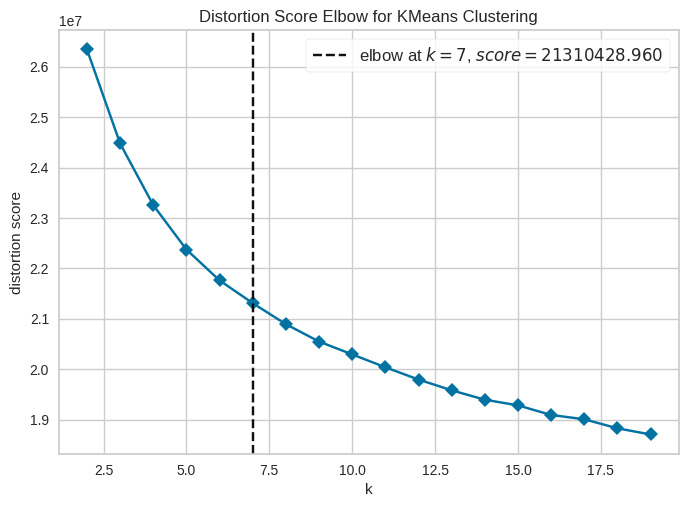


Running DBSCAN clustering analysis...


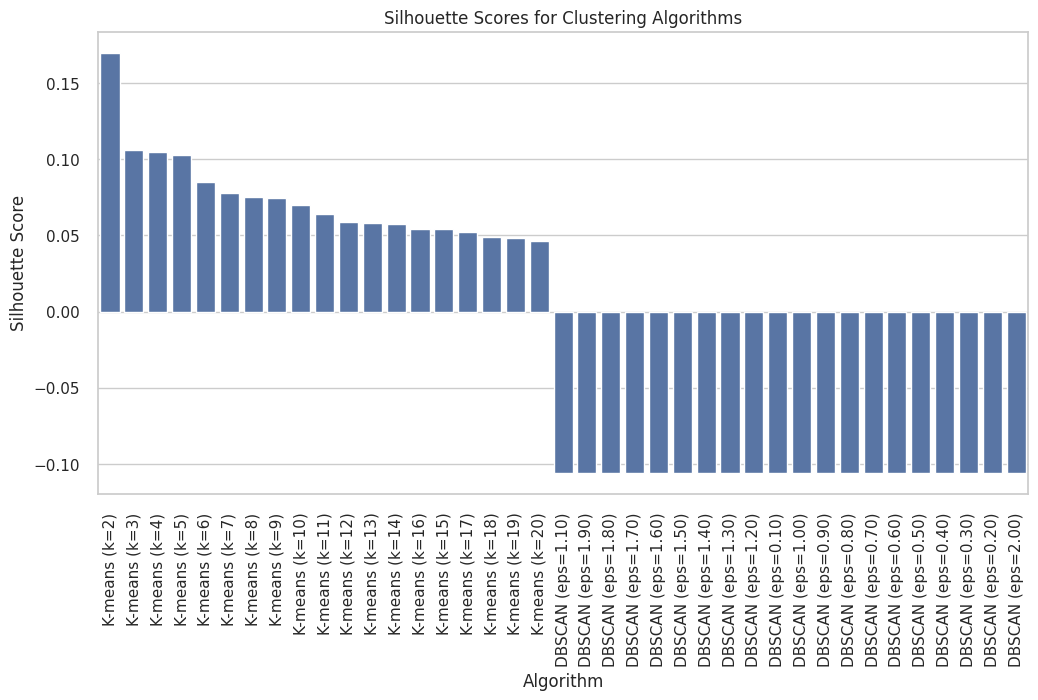


Clustering Results:
        Algorithm  Silhouette Score  Calinski-Harabasz Score  Clusters
    K-means (k=2)          0.169875              3692.210891         2
    K-means (k=3)          0.106325              2558.201042         3
    K-means (k=4)          0.104623              2058.094174         4
    K-means (k=5)          0.103116              1751.614180         5
    K-means (k=6)          0.084935              1525.266096         6
    K-means (k=7)          0.077881              1356.565294         7
    K-means (k=8)          0.075508              1227.017408         8
    K-means (k=9)          0.074609              1123.267270         9
   K-means (k=10)          0.069943              1033.078407        10
   K-means (k=11)          0.063855               960.509625        11
   K-means (k=12)          0.059098               899.274797        12
   K-means (k=13)          0.058278               845.605731        13
   K-means (k=14)          0.057219               798.54

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
import io

# Load and preprocess data
def load_and_preprocess(filepath):
    """
    Load, check for missing values, and normalize image pixel data.
    """
    #filepath = r"E:\\HomeworkTEC\\MachineLearning\\TP3\\datos_imagenes_USAR.csv"
    #df = pd.read_csv(filepath)
    df =  pd.read_csv(io.BytesIO(uploaded['datos_imagenes_USARHALF.csv']))
    #print("Missing values:", df.isnull().sum().sum())

     # Process any semicolon-separated strings
    if df.select_dtypes(include='object').applymap(lambda x: isinstance(x, str) and ';' in x).any().any():
        # Splitting semicolon-separated values and expanding into separate columns
        df = df.apply(lambda x: x.str.split(';').explode() if x.dtype == 'object' else x).astype(float)

    # Standardize pixel values
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=0.95, random_state=42)
    data_reduced = pca.fit_transform(scaled_data)
    print(f"Data reduced to {data_reduced.shape[1]} principal components.")

    return data_reduced, df

# Function to evaluate clustering
def evaluate_clustering(data, labels, algorithm_name):
    """
    Calculate silhouette and Calinski-Harabasz scores for clustering results.
    """
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters > 1:
        silhouette = silhouette_score(data, labels)
        calinski = calinski_harabasz_score(data, labels)
    else:
        silhouette, calinski = np.nan, np.nan

    return {
        'Algorithm': algorithm_name,
        'Silhouette Score': silhouette,
        'Calinski-Harabasz Score': calinski,
        'Clusters': n_clusters
    }

# Function to plot elbow curve
def plot_elbow(data):
    """
    Plot elbow curve for K-means clustering.
    """
    visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2, 20), timings=False)
    visualizer.fit(data)
    visualizer.show()

# Main analysis function
def run_clustering_analysis(filepath):
    """
    Run clustering analysis with K-means and DBSCAN algorithms.
    """
    # Load and preprocess data
    data, _ = load_and_preprocess(filepath)
    results = []

    # 1. K-means Clustering
    print("\nRunning K-means clustering analysis...")
    kmeans_models = {}
    for k in range(2, 21):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        kmeans_models[k] = kmeans

        # Evaluate clustering
        results.append(evaluate_clustering(data, kmeans.labels_, f'K-means (k={k})'))

    # Plot K-means elbow curve
    plot_elbow(data)

    # 2. DBSCAN Clustering
    print("\nRunning DBSCAN clustering analysis...")
    dbscan_models = {}
    eps_values = np.linspace(0.1, 2, 20)

    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=5)
        dbscan.fit(data)
        labels = dbscan.labels_

        # Evaluate only if clusters are found
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if 1 < n_clusters < 20:
            dbscan_models[eps] = dbscan
            results.append(evaluate_clustering(data, labels, f'DBSCAN (eps={eps:.2f})'))

    # Create results DataFrame
    results_df = pd.DataFrame(results)

    # Display top results for clarity
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    sns.barplot(data=results_df.sort_values("Silhouette Score", ascending=False), x="Algorithm", y="Silhouette Score")
    plt.title("Silhouette Scores for Clustering Algorithms")
    plt.xticks(rotation=90)
    plt.show()

    return results_df, kmeans_models, dbscan_models

# Run the analysis
if __name__ == "__main__":
    results_df, kmeans_models, dbscan_models = run_clustering_analysis('USAR_image_data.csv')

    # Display results
    print("\nClustering Results:")
    print(results_df.to_string(index=False))
